## FIRST STEPS IN EXPLORING EEG DATA

Now that we have visualized and explore EEG data using Anywave, we will try to carry out similar work using Python and Python-MNE, a tool used by many researchers in EEG, MEG and fMRI.
Make sure that the folders containing your data are in the same directory as your Jupyter notebooks and Python scripts. This will make it easier to load in data.

In [1]:
# Magic command to allow us to interact with figures in Jupyter; only works in Jupyter.
import os
import matplotlib.pyplot as plt
import numpy as np
import mne
import ipympl
import pandas as pd

%matplotlib qt

2023-03-20 15:43:34.324 Python[62443:1630680] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to /var/folders/60/tv1lj_b10zq7ypz5s1kvq4_cr3bc6f/T/org.python.python.savedState


In [ ]:
'''
    Load in an BDF dataset. It should be in the same directory as this script.
    We will read in the bdf file using mne input-output module.
    This will load in a raw object.
    Then plot all channels of the raw data.
'''
%matplotlib widget
fname = 'sub-001_eeg_sub-001_task-think1_eeg.bdf'
rawIn = mne.io.read_raw_bdf(fname, preload=True)

scale_dict = dict(mag=1e-12, grad=4e-11, eeg=20e-6, eog=150e-6, ecg=5e-4,
     emg=1e-3, ref_meg=1e-12, misc=1e-3, stim=1,
     resp=1, chpi=1e-4)
mne.viz.plot_raw(rawIn, duration=5.0, scalings=scale_dict, remove_dc=True)

Opening raw data file python-raw.fif...
Isotrak not found
    Range : 0 ... 206439 =      0.000 ...   206.439 secs
Ready.
Reading 0 ... 206439  =      0.000 ...   206.439 secs...


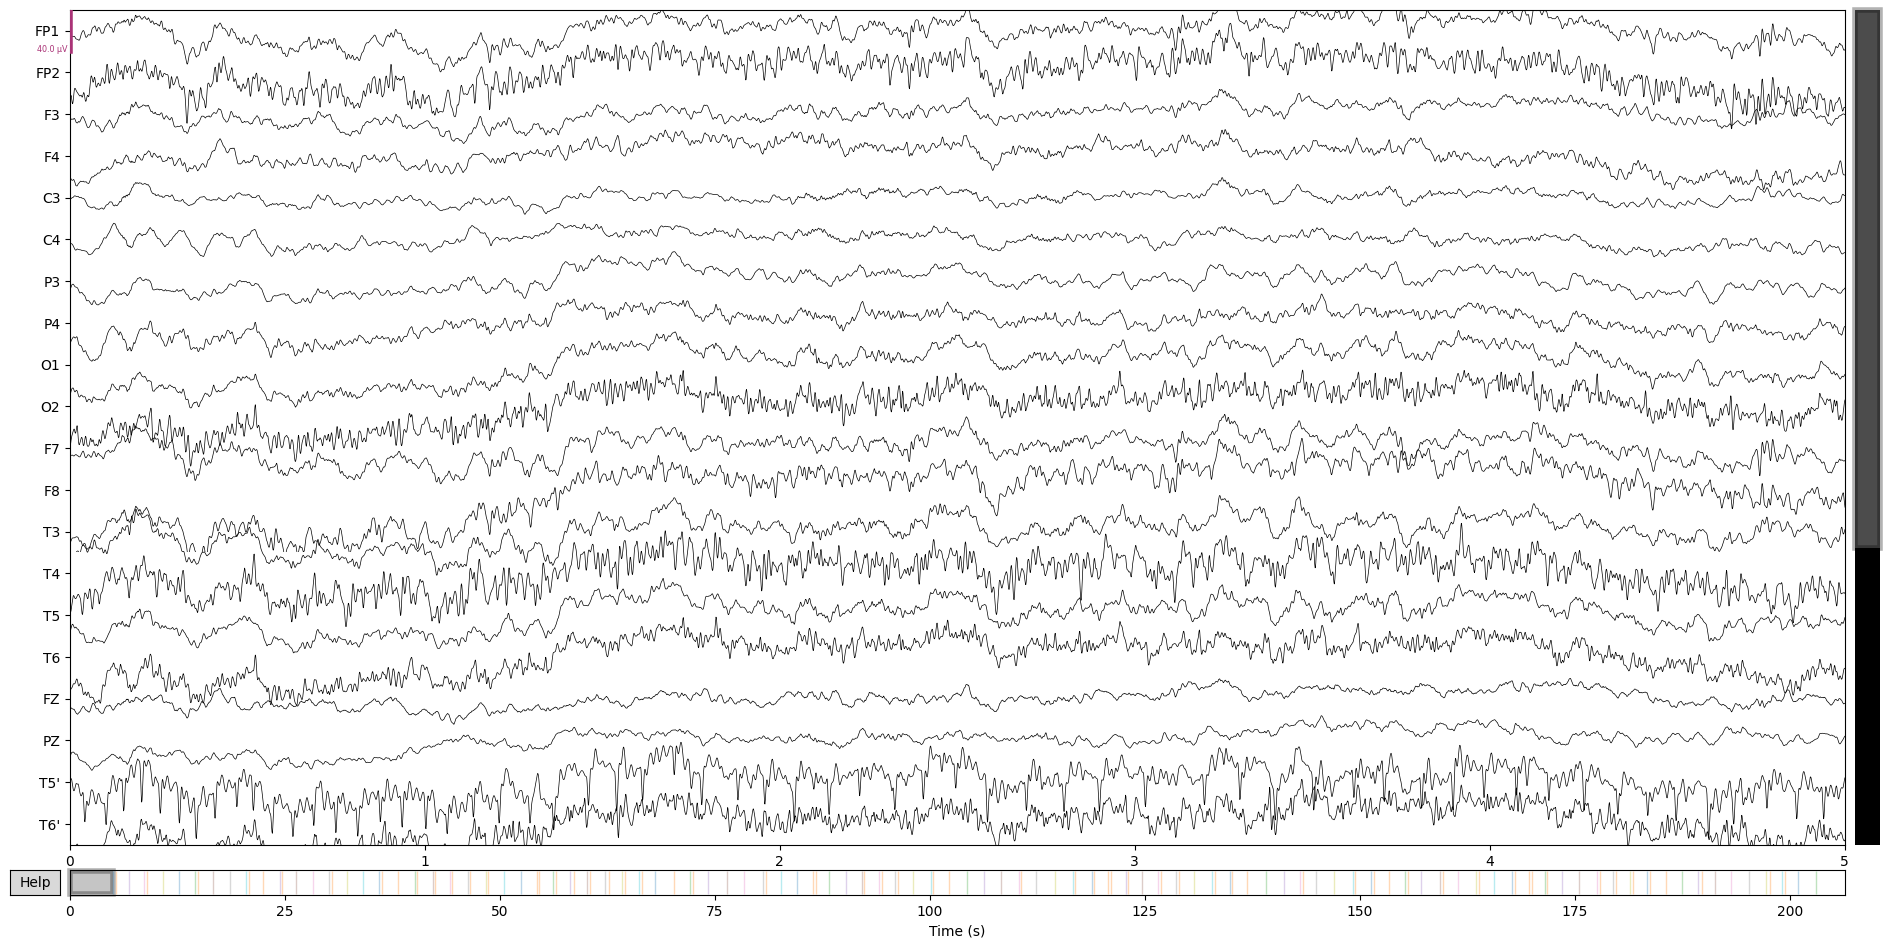

In [3]:
'''
    The *.bdf file is quite large and may not work in Binder.
    In this case we can load in the *python-raw.fif" file; *.fif is the mne python format.
'''

file2read = 'python-raw.fif'   # Define the path to dataset and the dataset title.

rawIn = mne.io.read_raw_fif(file2read, preload=True)

scale_dict = dict(mag=1e-12, grad=4e-11, eeg=20e-6, eog=150e-6, ecg=5e-4,
     emg=1e-3, ref_meg=1e-12, misc=1e-3, stim=1,
     resp=1, chpi=1e-4)
mne.viz.plot_raw(rawIn, duration=5.0, scalings=scale_dict, remove_dc=True)

### The external channels 

Ext1 and Ext2: HEOG; 
Ext3 and Ext 4: VEOG (blinks); 
Ext 7: ECG
Ext5: M1
Ext6: M2
Ext8: FP1

In [ ]:
# If using the *.bdf file
# Set the auxiliary channels to type 'misc' and the stimulus channel to type 'stim'.
# This allows each data type to be scaled appropriately when visualized.

my_dict={'EXG1': 'eog', 'EXG2': 'eog', 'EXG3': 'eog', 'EXG4': 'eog', 'EXG5': 'eog' , 'EXG6': 'eog', 'EXG7': 'eog', 'EXG8': 'eog',
        'GSR1': 'misc', 'GSR2': 'misc', 'Erg1': 'stim', 'Erg2': 'stim', 'Resp': 'resp', 'Plet': 'misc', 'Temp': 'misc', 'Status': 'stim'}
print(my_dict)
rawIn.set_channel_types(my_dict)

mne.viz.plot_raw(rawIn, duration=5.0, scalings=scale_dict, remove_dc=True)

{'CB1"': 'misc', 'CB2"': 'misc', 'CB1': 'misc', 'CB2': 'misc'}


/var/folders/60/tv1lj_b10zq7ypz5s1kvq4_cr3bc6f/T/ipykernel_62443/1561577643.py:4: RuntimeWarning: The unit for channel(s) CB1, CB1", CB2, CB2" has changed from V to NA.
  rawIn.set_channel_types(my_dict)


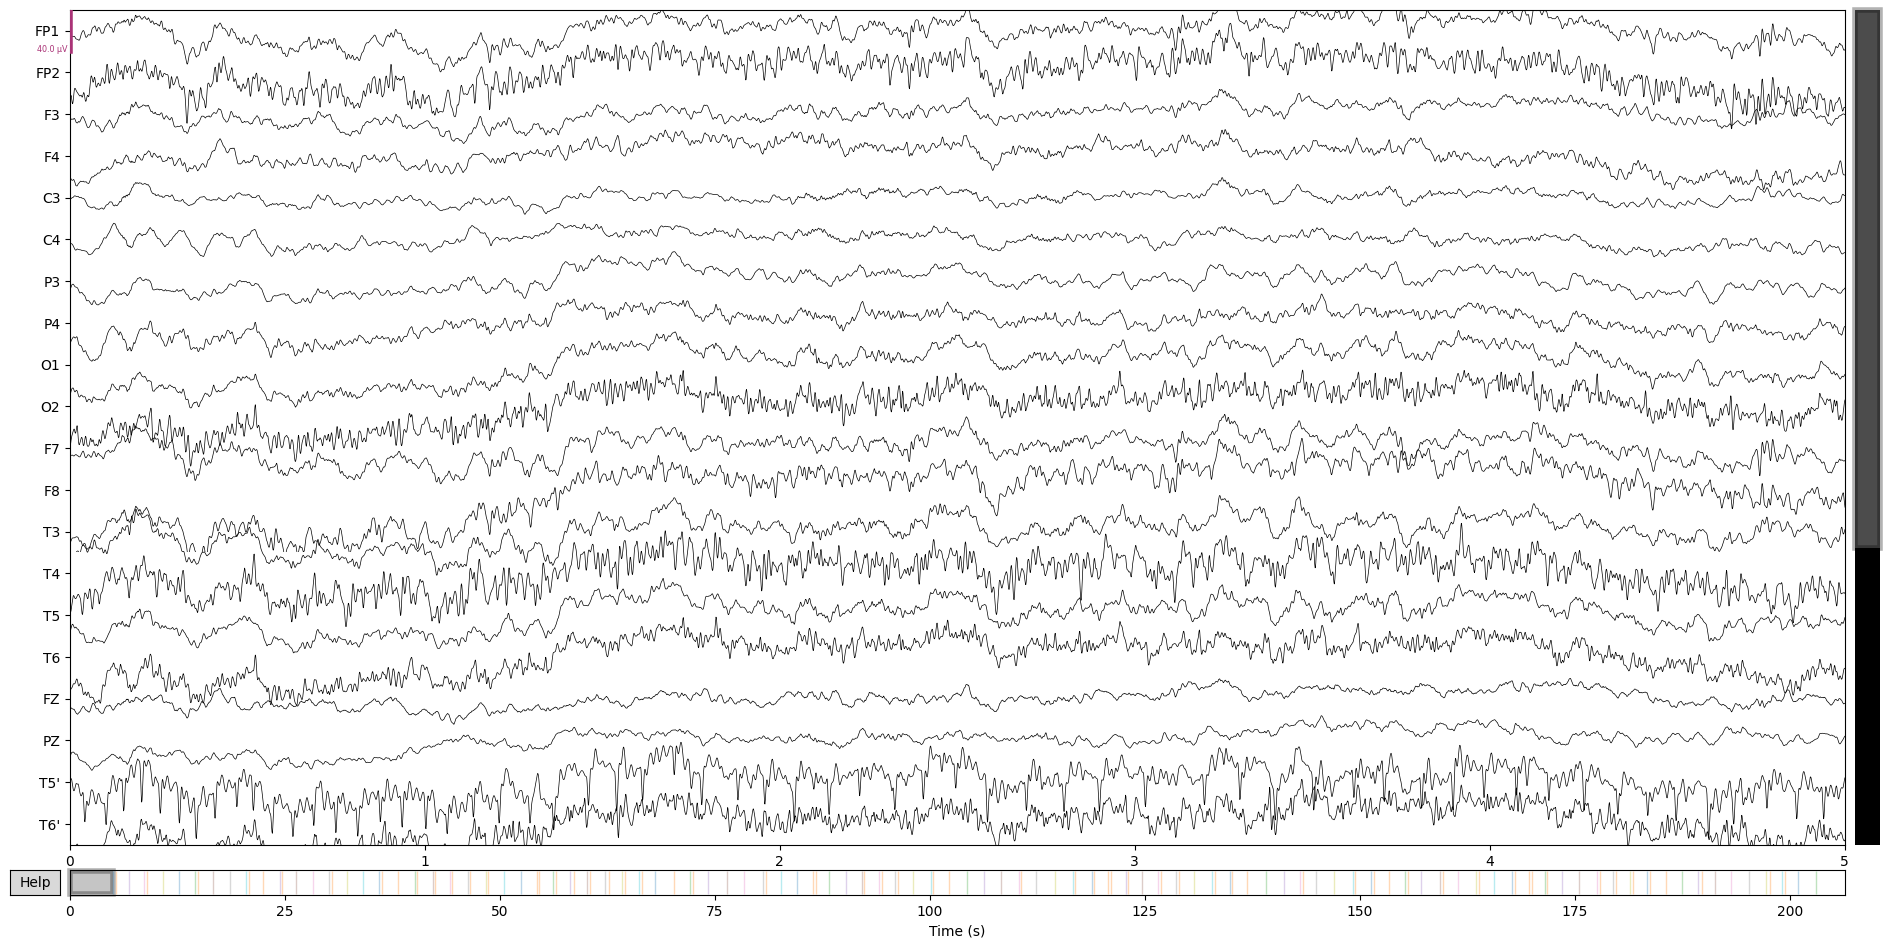

Channels marked as bad:
none
Channels marked as bad:
none


In [6]:
# If using the python-raw.fif file
my_dict = {'CB1"': 'misc', 'CB2"': 'misc', 'CB1': 'misc', 'CB2': 'misc'}
print(my_dict)
rawIn.set_channel_types(my_dict)

mne.viz.plot_raw(rawIn, duration=5.0, scalings=scale_dict, remove_dc=True)

In [5]:
# Extract the data from the raw file and get the dimensions of the data.

data1 = rawIn.get_data()     
data_dim = data1.shape
print(data_dim)
print('The number of channels in the current raw dataset is: ', data_dim[0])
print('\nThe number of time samples in the current raw dataset is: ', data_dim[1])

(31, 206440)
The number of channels in the current raw dataset is:  31

The number of time samples in the current raw dataset is:  206440


In [ ]:
# Let's take a look at the rawmed1.info attribute, which contains an 'info' object.
# This info object is a python dictionary.

print(rawIn.info)


In [ ]:
# Let's find the following information from the info object.
# - Sampling frequency (Hz)
# - Channel labels (electrode names)


sfreq = rawIn.info['sfreq']
print('The sampling frequency of the current dataset is: ', sfreq)

chan_names = rawIn.info['ch_names']
print(chan_names)

# print out the limit of the lowpass filter applied...


## TASK 1
Now that you know the sampling rate of the current raw dataset, you know how many times per second the EEG signal was sampled.
You also know the number of time samples of the dataset.
With this information, you are going to create the time vector. The time vector shows the time (in seconds) that corresponds to each sample of the data.

CLUE: Given that you know the sampling frequency, what is the time step from one sample to the next?
      Remember that the sampling frequency tells you how many samples there for every second. 

In [ ]:
## -----------------------We know the sampling rate of the data, so can we construct the time vector?----------------------
'''
   Define the sampling frequency (srate) and the number of samples that the time vector should be composed of.
   Define the time step.
   CLUE: you could use the numpy function, arange: numpy.arange(start, stop, step)
'''
srate = sfreq               # The sampling frequency.
datasize = data_dim[1]      # The number os samples in the time vector.
tstep    = 
timev    = 

print('The length of the time vector is: ',len(timev))
print(f'The duration of the time vector is {timev[-1]}seconds')
                

## Now plot a single channel
We will plot the Cz channel using the time vector that we just calculated above.
We use the *index()* method to get the index of the Cz channel.sfreq

In [ ]:
%matplotlib inline
''' Now we can plot the data of a single electrode over time.
    We want to plot the Cz electrode...
'''

chanidx = chan_names.index('Cz')             # Find the index of the Cz electrode.
plt.plot(timev, data1[chanidx, :])        # Plot the Cz signal
plt.xlabel('time (seconds)')

## Plot an individual channel over a defined time interval
Here we will just plot the data of the Pz channel over the 60second to 70second time interval.
This means that we need define a shorter time interval.

In [ ]:
### But we may want to visualize individual channel data for a pre-defined time interval.
"""Need to consctruct the new time vector"""
lims_sec    = np.array([60, 70])               # We will define the limits of the time interval, from 60seconds to 70seconds
lim1, lim2  = (lims_sec * srate).astype(int)   # Find the indices of the start and end of chosen time interval
chan2plot   = 'Pz'                             # The index of the channel that you want to plot, here Pz
chanindx2   = chan_names.index(chan2plot)
RawIn_sel   = data1[chanindx2, lim1:lim2]   # Extract the raw data of interest

# Now plot the time interval of data.
t = timev[lim1:lim2]                             # We define a new time vector, t, as being between lim1 and lim2
plt.plot(t,RawIn_sel)
plt.show()

## Plot several channels over a defined time interval

Here we will plot several channels over a predefined interval.
We will plot these channels on the same plot, one above the other.

In [ ]:
chans_sel    = ['C3', 'Cz', 'C4']                                     # Define the channels that you want to plot.
chanidx3     = [chan_names.index(item2) for item2 in chans_sel ]      # Find the indices of the channels that you want to plot.

data_sel    = data1[chanidx3, lim1:lim2]  # Extract the data for the time interval and electrode of interest.
yoffset     = np.array([.001, 0, .001])      # Define a y-offset to seperate the channels
y           = data_sel.T + yoffset            # RawIn_sel2.T finds the transpose of the data array - exchange between columns and rows
                                            
pline = plt.plot(t, y)
plt.xlabel('Time (seconds)')
plt.ylabel('Magnitude (\mu_V)')
plt.legend(pline, chans_sel)                 # We include a legend to show which signal corresponds to which channel.
plt.show()

In [ ]:
## Now we will plot the EEG again with one little change...

mne.viz.plot_raw(rawIn, scalings='auto', remove_dc=False)

# THE DC OFFSET

You notice that none of the electrodes appear to be visible...this is due to what we call the "**DC Offset**".
The acquisition system works on battery, so DC, and it captures ALL the frequencies including the OHz.
The OHz is the offset from zero mean. 
So we need to remove this offset; after which our signals will have a zero mean.

#### There are different ways of removing the DC Offset:

We will start by trying to remove the DC offset, by subtracting the mean activity from the activity of one channel.
Then we will plot the result.
So...
- Let's calculate the mean of a few channels.
- What do you notice about the means? How do we know that there is a DC offset?

Note also the use of the *copy()** method. We use this to make a copy of the original **RawIn** object.
When we apply a method such as, *.pick_channels*, to a raw object, we change that object. Therefore, the copy() method is very useful.

In [ ]:
## To test the effect of the DC offset, we will find the mean of a few electrodes.
"""
    Find the mean of the data from several channels.
    What can we say about the means?
"""

raw_temp   = rawIn.copy()                    # Create a copy of the raw object and name it RawIn_temp
raw_temp.pick_channels(['F3', 'Fz', 'F4'])     # We are going to compute of a subset of channels.
dataIn     = raw_temp.get_data()               # Extract the data from the RawIn object.
data_mean  = np.mean(dataIn, 1)                # We want to find the mean over the time samples, so the 2nd dimension.
Dmean      = data_mean.tolist()                # Converting the array to a list.

print('The mean for each  electrode: {} '.format(Dmean))

## Removing the DC Offset

So, if we think we need to remove the DC offset, we can do one of the following:
- Subtract the mean of each signal from each time sample of each channel.
- Carry out high-pass filtering to remove the 0Hz
- Carry out **detrending**

In the following, you can compare the effect of subtracting the mean and high-pass filtering.
We can carry out this test on the **RawIn_sel2** data, that consists of 6 channels.

In [ ]:
## Subtract the mean
# We already know the means of the 6 channels, they are stored in the Dmean list and the data_mean array.
# The channel-data of the RawIn_temp object is "dataIn"
chan_demean1 = np.subtract(dataIn[0,], Dmean[0])
chan_demean2 = np.subtract(dataIn[1,], Dmean[1])
chan_demean3 = np.subtract(dataIn[2,], Dmean[2])

%matplotlib qt
## Plot the original and demeaned channels
ax1 = plt.subplot(231)
ax1.margins(0.5)
ax1.plot(timev, dataIn[0,])

ax2 = plt.subplot(232)
ax2.margins(0.5)
ax2.plot(timev,dataIn[1,])

ax3 = plt.subplot(233)
ax3.margins(0.5)
ax3.plot(timev,dataIn[2,])

ax4 = plt.subplot(234)
ax4.margins(0.5)
ax4.plot(timev, chan_demean1)

ax5 = plt.subplot(235)
ax5.margins(0.5)
ax5.plot(timev,chan_demean2)

ax6 = plt.subplot(236)
ax6.margins(0.5)
ax6.plot(timev,chan_demean3)

# FILTERING THE EEG SIGNAL

In EEG, we generally filter to remove high frequency artifacts and low frequency drifts.
We can filter our time-domain data, our continuous EEG.
We can also filter our spatial-domain data using spatial filters.

We begin by filtering our time-domain data:
- we apply a high-pass filter to remove low frequency drifts and the DC Offset.
- we apply a low-pass filter to remove high frequency artifacts.
Here we are going to apply a *high-pass filter* only to try to remove the DC offset.

In [ ]:
## Filter the EEG Signal.
#  High-pass filter with limit of 0.1Hz. 
#  Note that we create a copy of the original rawmed1 object before filtering.

rawIn_filt = rawIn.copy().filter(0.1, None, fir_design='firwin')

## Task 2:

Compare the effect of removing the DC component by demeaning and by filtering for the following set of electrodes:
- midline electrodes
- frontal electrodes on the left hemisphere.
- frontal electrodes on the right hemisphere.

Look at the effect of high-pass filtering at 0.5Hz and 1Hz

Write your code in the cell below.

In [ ]:
## Code for Task 2 goes here.

## Visual Inspection and Annotation of Data

Visually inspect the raw data, **RawIn_ref** by calling **RawIn_ref.plot()

Bad channels are color coded gray. By clicking the lines or channel names on the left, you can mark or unmark a bad channel interactively. You can use +/- keys to adjust the scale (also = works for magnifying the data). Note that the initial scaling factors can be set with parameter scalings. If you don’t know the scaling factor for channels, you can automatically set them by passing scalings=’auto’. With pageup/pagedown and home/end keys you can adjust the amount of data viewed at once.

You can enter annotation mode by pressing a key. In annotation mode you can mark segments of data (and modify existing annotations) with the left mouse button. You can use the description of any existing annotation or create a new description by typing when the annotation dialog is active. Notice that the description starting with the keyword 'bad' means that the segment will be discarded when epoching the data. Existing annotations can be deleted with the right mouse button. Annotation mode is exited by pressing a again or closing the annotation window.

This functionality can bug a bit!!

In [ ]:
## We will plot our high-pass filtered data.

rawIn_filt.plot(duration= 20, start = 60, scalings='auto', remove_dc=False)

### -------------------- PLOT TOPOGRAPHIES FOR DEFINED TIME INTERVAL -------------------------
In addition to looking at the signal as a function of time.
We can look at the spatial distribution of activity across the head (topography) for a given time interval.
We could do this to highlight activity as a specific time or verify if certain activity corresponds to an artifact.
The plot a single topography, we need to define a vector of the mean activity over a defined time interval.

- Try to find a time interval containing eye-blinks or ECG or alpha oscillation.
- Note the time interval or intervals.
- Plot the topography of the activity over this time interval.

The function to plot topography is given below.
You can use the EEG artifact, characteristics CheatSheet to help you detect these artifacts.
Note: Before we can visualise the topography, we need to define the electrode layout or **montage** that corresponds
to the current data.
Here we use the standard 10-20 montage.

<img src="figures/10-20_1.jpg" width=520 height=550 /><br />

In [ ]:
'''
    Add the montage information to the current raw object, RawIn.
    This is required if you want to plot the topography maps.
'''
montage = mne.channels.make_standard_montage('standard_1020')               # Assigning the standard 10-20 montage
mne.viz.plot_montage(mne.channels.make_standard_montage('standard_1020'))   # Visualize the montage
rawIn_filt.set_montage(montage)

In [ ]:
## When we plot the spatial distribution of activity, we pick a time interval of interest 
#  and plot the mean activity within that time interval. 

t_int = [70, 75]
timeIndx = rawIn_filt.time_as_index(t_int)
chan_range = np.arange(0,64)
dataseg1 = rawIn_filt.get_data(chan_range, timeIndx[0], timeIndx[1])
dataseg_avg = np.mean(dataseg1, 1)

fig, ax = plt.subplots(1)
mne.viz.plot_topomap(dataseg_avg, rawIn_filt.info, ch_type='eeg', axes=ax)

In [ ]:
## Now let's plot topographies over several time intervals of interest.

time_ints = np.arange(60, 64, 1)                   # Define the time intervals and time step
print(time_ints)


In [ ]:
fig, axes = plt.subplots(1, len(time_ints)-1, figsize=(15, 5))

for ind in range(len(time_ints)-1):
    curr_int =  [time_ints[ind], time_ints[ind+1]]
    print(curr_int)
    timeIndx2 = rawIn_filt.time_as_index(curr_int) 
    print(timeIndx2)
    dataseg_curr  = rawIn_filt.get_data(chan_range, timeIndx2[0], timeIndx2[1])
    datamean_curr = np.mean(dataseg_curr, 1)
    
    mne.viz.plot_topomap(datamean_curr, rawIn_filt.info, ch_type='eeg', axes=axes[ind])
    axes[ind].set_title(str(time_ints[ind])+' - '+ str(time_ints[ind+1])+'seconds', {'fontsize' : 20})
    

# Exploring the Spectral & Spectro-Temporal Characteristics of EEG

We can also study the EEG signal in terms of its spectral content. 


In [ ]:
# Plot the power spectral density over:
# - the 1Hz to 80Hz frequency band
# - a predefined time interval (60 - 80seconds)

%matplotlib widget
mne.viz.plot_raw_psd(rawIn_filt, fmin=1, fmax=100, tmin=60, tmax=80, picks='eeg', dB=True)

## Exploring the spectral content over a sub-set of channels

Plotting the average topographies for different frequency bands (theta, alpha, beta, gamma).



In [ ]:
# Plotting the topography of activity in different frequency bands.

spectra = rawIn_filt.compute_psd(method='multitaper', fmin=0.5, fmax=80, tmin=None, tmax=None, picks='eeg')   # This yields a spectra object.
psds, freqs = spectra.get_data(exclude=(), return_freqs=True)
print('The frequencies are: ', freqs)

# Plot the spectra as a function of frequency.
chan_sel = ['Fpz','Fz','FCz','Cz','CPz','Pz']
spectra.plot(picks=chan_sel)

fbands = {'Theta (4-7Hz)': (4,7), 'Alpha (8-12 Hz)': (8, 12), 'Beta (12-30 Hz)': (12, 30),
         'Gamma (30-45 Hz)': (30, 45)}

spectra.plot_topomap(bands=fbands, ch_type='eeg')

# Task 3

In the cell below, perform the following:
- Load in the dataset "sub-001_eeg_sub-001_task-think1_eeg.bdf"
- Display the following information onscreen:
                - sampling frequency
                - number of 'eeg'channels
                - the title of the 'eeg' channels
                - the number of sample points
                - the time resolution of the input data.
- In separate plots, plot the average time signal over:
                - the midline electrodes
                - RH frontal electrodes
                - LH frontal electrodes
                - RH posterior electrodes
                - LH posterior electrodes
- Plot the spectrum at three different time intervals: beginning, middle, end of data. 
                - Do you notice a difference?
                - What is the peak frequency?
- Plot the topography of alpha-band activity over the same time intervals and compare. 

- Compare the alpha-band topography over the same time intervals of the datasets, sub-001_eeg_sub-001_task-think1_eeg.bdf and sub-001_eeg_sub-001_task-med2_eeg.bdf. Do you notice any difference?

Use the code provided in the example above to help you. 


In [ ]:
# The code for task 3 goes here...

## Plotting the Frequency Spectrum of EEG Signals

When trying to detect noisy electrodes it is helpful to look at the frequency spectrum of the electrodes.
The presence of low frequency or high frequency activity with a lot of energy can indicate a noisy electrode.
Below we will plot the **Power Spectral Density (PSD)** for frequencies between 0.5Hz and 40Hz.
The power spectral density will be plotted in dB.
You can try plotting it again but setting the dB to **False**, can you see a difference?

### Mark the Noisy Channels as "Bad"

Because activity that corresponds to noise is very often of higher amplitude than the EEG activity that interests us.
We can detect bad electrodes by considering:
- the time course of the signals.
- the frequency spectrum of the signals.
It is important to detect these souces of noise so that we can exclude them from our analysis.
Here we will mark the noisy channels as **bad** so that we can exclude them from our analysis.

## Task 4:
# Can you find any noisy electrodes that we may need to exclude from our data?
# Plot the time course and the frequency spectra of these electrodes to justify your choice.
You can do this task in the cell below.

In [ ]:
'''
   The code for Task 4 can go here.
'''

In [ ]:
'''
        We mark a channel as "bad" by adding it to the "bads" attribute of "info".
'''
ChanBad = ['Fp1']
RawIn_filt.info['bads'] = ChanBad

# Plot the PSD again but without the channel marked as "bad".
mne.viz.plot_raw_psd(RawIn_filt, fmin=0.5, fmax=40, dB=True, exclude='bads')

## Re-referencing the EEG:

The potential measured in microVolts is measured in relation to the potential at another point, called the reference.

This means that the activity at each channel is interpreted relative to the potential at a reference.
- the reference can be the mean activity of all electrodes.
- the average of the two mastoids (generally these reference channels are marked as Ref1, Ref2 or EXG1, EXG2)
The current dataset does not have the external (EXG) channels, so we will apply an average reference.

However, we cannot include the bad channels or the VEOG when applying the reference.
We use the *pick_types()* method to exclude these channels when applying the average reference.

<a href="https://predictablynoisy.com/mne-python/generated/mne.set_eeg_reference.html"> Link to MNE page on **mne.set_eeg.reference()**</a>

In [ ]:
'''
    Note that we are excluding the eog channel and the bad channels from the average reference calculation.
'''
RawIn_ref = RawIn_filt.copy().pick_types(eeg=True, exclude= ['bads','eog']).set_eeg_reference()

## Visual Inspection and Annotation of Data

Visually inspect the raw data, **RawIn_ref** by calling **RawIn_ref.plot()

Bad channels are color coded gray. By clicking the lines or channel names on the left, you can mark or unmark a bad channel interactively. You can use +/- keys to adjust the scale (also = works for magnifying the data). Note that the initial scaling factors can be set with parameter scalings. If you don’t know the scaling factor for channels, you can automatically set them by passing scalings=’auto’. With pageup/pagedown and home/end keys you can adjust the amount of data viewed at once.

You can enter annotation mode by pressing a key. In annotation mode you can mark segments of data (and modify existing annotations) with the left mouse button. You can use the description of any existing annotation or create a new description by typing when the annotation dialog is active. Notice that the description starting with the keyword 'bad' means that the segment will be discarded when epoching the data. Existing annotations can be deleted with the right mouse button. Annotation mode is exited by pressing a again or closing the annotation window.

This functionality can bug a bit!!

# Task 5:
Manually annotate the continuous by marking examples of the following, if you find them:
- Eye-blinks
- Electrode jumps
- Cardiac artifact (ECG)

In [ ]:
### HERE WE WILL MANUALLY ANNOTATE THE CONTINUOUS DATA TO MARK EYE-BLINKS OR BIG ELECTRODE JUMPS
fig = RawIn_ref.plot(block=True)              # Open the interactive raw.plot window. This should open a separate window.
fig.canvas.key_press_event('a')

## Automatic Detection of Eye-Blinks
In MNE there is a function that automatically identifies eye-blinks.
It allows you to segment the data around the eye-blinks identified and then plot the spatial distribution of the activity corresponding to eye-blinks.
However, to identify the eye-blinks you need to define a channel on which eye-blinks clearly appear.
In the code we have set this channel to be **AF8** but it may not be the best choice.

In [ ]:
eogev_elec = 'AF8'                                #Put the label of your selected electrode here...try different electrodes.
eog_epochs = mne.preprocessing.create_eog_epochs(RawIn_ref, ch_name=eogev_elec, reject_by_annotation=False)
eog_epochs.apply_baseline(baseline=(None, -0.2))  # We go from the start of the interval to the -200ms before 0ms
eog_epochs.average().plot_joint()
eog_epochs.average().plot_topomap()

## Automatic Detection of ECG (Cardiac activity)
In MNE there is a function that automatically identifies cardiac activity (ECG).
It allows you to segment the data around the eye-blinks identified and then plot the spatial distribution of the activity corresponding to ECG.
However, to identify the cardiac artifacts you need to define a channel on which they clearly appear.
Can you identify any channel that clearly displays cardiac artifact?

In [ ]:
ecg_elec = '';
ecg_epochs = mne.preprocessing.create_ecg_epochs(RawIn_ref, ch_name=ecg_elec, reject_by_annotation=False)
ecg_epochs.apply_baseline(baseline=(, ))              # Can you suggest a baseline interval for ECG??
ecg_epochs.average().plot_joint()
ecg_epochs.average().plot_topomap()

## Segmenting the Continuous Data to look at **Evoked** Activity

We have been looking at the continuous data.
But, in EEG, we often like to look at the EEG in relation to a stimulus presented during the experiment.
We are interested in the activity **evoked** by the stimuli.

To study this **evoked** activity, we segment our data around the stimuli used in our study.
This means that the chop the data into segments, called **epochs**, by defining a time interval before the stimulus (**baseline**) and a time interval after the stimulus (**post-stimulus interval**).

In the example below we will load the *.csv file in which the timing of the stimuli are defined.
Then we can this **event** data to our Raw object and the segment the continuous data.

***
In the data used here, the stimuli are the following:
- A Standard Tone
- A Novel Tone
- A Target Tone

In [ ]:
event_data = pd.read_csv(
    './AuditoryOddball_TBI/sub-002/session1/sub-002_ses-01_task-ThreeStimAuditoryOddball_events.csv', sep=';', header=None)
annotations = mne.Annotations(event_data[0], event_data[1], event_data[2])
RawIn_filt.set_annotations(annotations)
events, events_id = mne.events_from_annotations(RawIn_filt)
print(events_id)

In [ ]:
'''
   Segmenting the Continuous Data, we will first segment around all the events.
'''

tmin, tmax = [ -0.1,1 ]
reject_criteria = dict(eeg=40e-6)   # Criterion for epoch rejection
event_dict = {'Novel Tone': 1, 'Standard Tone': 2, 'Target Tone': 3}
# Call of function to segment the data into epochs.
epoch_data = mne.Epochs(RawIn_filt, events, event_id=event_dict, tmin=tmin, tmax=tmax, reject=None, reject_by_annotation=False,
                        baseline=(tmin, 0), preload=True,
                        detrend=None, verbose=True)

fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=RawIn_filt.info['sfreq'],
                          first_samp=RawIn_filt.first_samp)

## Plotting Epoched Data
- Here we plot the epoched data of the *Novel Tone* condition only.
- The frequency spectrum of the *Novel Tone* activity.
- An ERP-image and mean activity for the *Novel Tone* condition.

In [ ]:
%matplotlib widget
epoch_data['Novel Tone'].plot(events=events, event_id=event_dict, butterfly=True)

In [ ]:
epoch_data['Novel Tone'].plot_psd(picks='eeg')

In [ ]:
epoch_data['Novel Tone'].plot_image(picks='eeg', combine='mean')

## Calculate the Evoked Activity for each condition
We calculate the **evoked** activity for each condition (or stimulus) by averaging over all the epochs corresponding to that stimulus.
Now we can compare the EEG activity for each experimental condition.

**Note:** The results here are not very informative as we are looking at the evoked activity of a single subject.
Normally, we calculate the average activity over several participants.

In [ ]:
epochs_novel = epoch_data['Novel Tone']
epochs_standard = epoch_data['Standard Tone']

# Now we will average over the novel and standard trials. This will give us our evoked activity.
evoked_novel = epochs_novel.average()
evoked_standard = epochs_standard.average()

mne.viz.plot_compare_evokeds(dict(novel=evoked_novel, standard=evoked_standard),
                             legend='upper left', show_sensors='upper right')